In [18]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
display(HTML("<style>.input_area pre {font-family: Consolas; font-size: 16pt; line-height: 140%;}</style>"))
display(HTML("<style>.output_area pre {font-family: Consolas; font-size: 16pt; line-height: 140%;}</style>"))

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np
import os
import glob
import datetime
import shutil
from collections import defaultdict, Counter
from copy import deepcopy
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
plt.rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

import matplotlib.patches as mpatches
import math

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

import statsmodels.stats.multitest as multest
import seaborn as sns
import scipy.stats as st

# Threshold

In [8]:
TTS_FDR=5.0e-07
TCPS_FDR=1.0e-03

# characterizing significant TT

In [6]:
TT_result=open('result/sig_TT&TCP/sig_TT.txt','w')
OV_sigPosTT=[]
OV_sigNegTT=[]
for cell in ['A375','HT29']:
    TTS=pd.read_table('result/TTscore/TTS_{}.txt'.format(cell), sep='\t',index_col=0,engine='python')
    
    sigPosTT=list(set(TTS.loc[(TTS['FDR']<TTS_FDR)&(TTS['TTS']>=0)].index))
    sigNegTT=list(set(TTS.loc[(TTS['FDR']<TTS_FDR)&(TTS['TTS']<0)].index))
    
    _=TT_result.write('{}(pos)\t{}\t{}\n'.format(cell, len(sigPosTT), ','.join(sigPosTT)))
    _=TT_result.write('{}(neg)\t{}\t{}\n'.format(cell, len(sigNegTT), ','.join(sigNegTT)))
    
    OV_sigPosTT+=sigPosTT
    OV_sigNegTT+=sigNegTT

OV_sigPosTT=[TT for TT in set(OV_sigPosTT) if OV_sigPosTT.count(TT)==2]
OV_sigNegTT=[TT for TT in set(OV_sigNegTT) if OV_sigNegTT.count(TT)==2]

_=TT_result.write('both(pos)\t{}\t{}\n'.format(len(OV_sigPosTT), ','.join(OV_sigPosTT)))
_=TT_result.write('both(neg)\t{}\t{}\n'.format(len(OV_sigNegTT), ','.join(OV_sigNegTT)))
TT_result.close()

C:\Users\jjmsk\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: read_table is deprecated, use read_csv instead.
  """


# characterizing significant TCP

In [9]:
def remove_dup(l1):
    l2=[]
    for (T1, T2) in l1:
        if (T2, T1) not in l2: 
            l2.append((T1,T2))
    
    l3=[]
    for TF_pair in l2:
        l3.append('|'.join(sorted(TF_pair)))

    return list(set(l3))

TCP_result=open('result/sig_TT&TCP/sig_TCP.txt','w')
OV_sigPosTCP=[]
OV_sigNegTCP=[]
for cell in ['A375','HT29']:
    TCPS=pd.read_table('result/TCPscore/TCPS_{}.txt'.format(cell), sep='\t',index_col=0,engine='python')
    TCPS.set_index(['g1','g2'], inplace=True)

    sigPosTCP=remove_dup(list(TCPS.loc[(TCPS['FDR']<TCPS_FDR)&(TCPS['Zobs(TCPS)']>=0)].index))
    sigNegTCP=remove_dup(list(TCPS.loc[(TCPS['FDR']<TCPS_FDR)&(TCPS['Zobs(TCPS)']<0)].index))

    _=TCP_result.write('{}(pos)\t{}\t{}\n'.format(cell, len(sigPosTCP), ','.join(sigPosTCP)))
    _=TCP_result.write('{}(neg)\t{}\t{}\n'.format(cell, len(sigNegTCP), ','.join(sigNegTCP)))
    
    OV_sigPosTCP+=sigPosTCP
    OV_sigNegTCP+=sigNegTCP

OV_sigPosTCP=[TCP for TCP in set(OV_sigPosTCP) if OV_sigPosTCP.count(TCP)==2]
OV_sigNegTCP=[TCP for TCP in set(OV_sigNegTCP) if OV_sigNegTCP.count(TCP)==2]

_=TCP_result.write('both(pos)\t{}\t{}\n'.format(len(OV_sigPosTCP), ','.join(OV_sigPosTCP)))
_=TCP_result.write('both(neg)\t{}\t{}\n'.format(len(OV_sigNegTCP), ','.join(OV_sigNegTCP)))
TCP_result.close()

C:\Users\jjmsk\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: read_table is deprecated, use read_csv instead.


# TTS&TCPS heatmap

C:\Users\jjmsk\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: read_table is deprecated, use read_csv instead.
  """
C:\Users\jjmsk\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: read_table is deprecated, use read_csv instead.
  if __name__ == '__main__':


Text(0.5, 1.0, 'TT scores of the significant TT\nin the both cell lines')

C:\Users\jjmsk\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: read_table is deprecated, use read_csv instead.
C:\Users\jjmsk\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: FutureWarning: read_table is deprecated, use read_csv instead.


A375   HT29    Ave.
g1    g2                         
MYBL2 TLX1   5.548  6.711  6.1295
AATF  TLX1   4.720  6.871  5.7955
      HOXA1  4.957  6.423  5.6900
      MYBL2  4.560  6.767  5.6635
CEBPE MXI1   4.560  6.725  5.6425

,,A375,HT29,Ave.
g1,g2,,,
IFI16,TLX1,-5.877,-6.908,-6.3925
MXI1,TLX1,-5.693,-6.726,-6.2095
ENO1,TLX1,-5.693,-6.726,-6.2095
CEBPE,MYBL2,-4.667,-6.755,-5.7110
ENO1,MYBL2,-5.005,-6.220,-5.6125


Text(0.5, 1.0, 'TCP scores of the significant TCP\nin the both cell lines')

C:\Users\jjmsk\Anaconda3\lib\site-packages\ipykernel_launcher.py:58: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


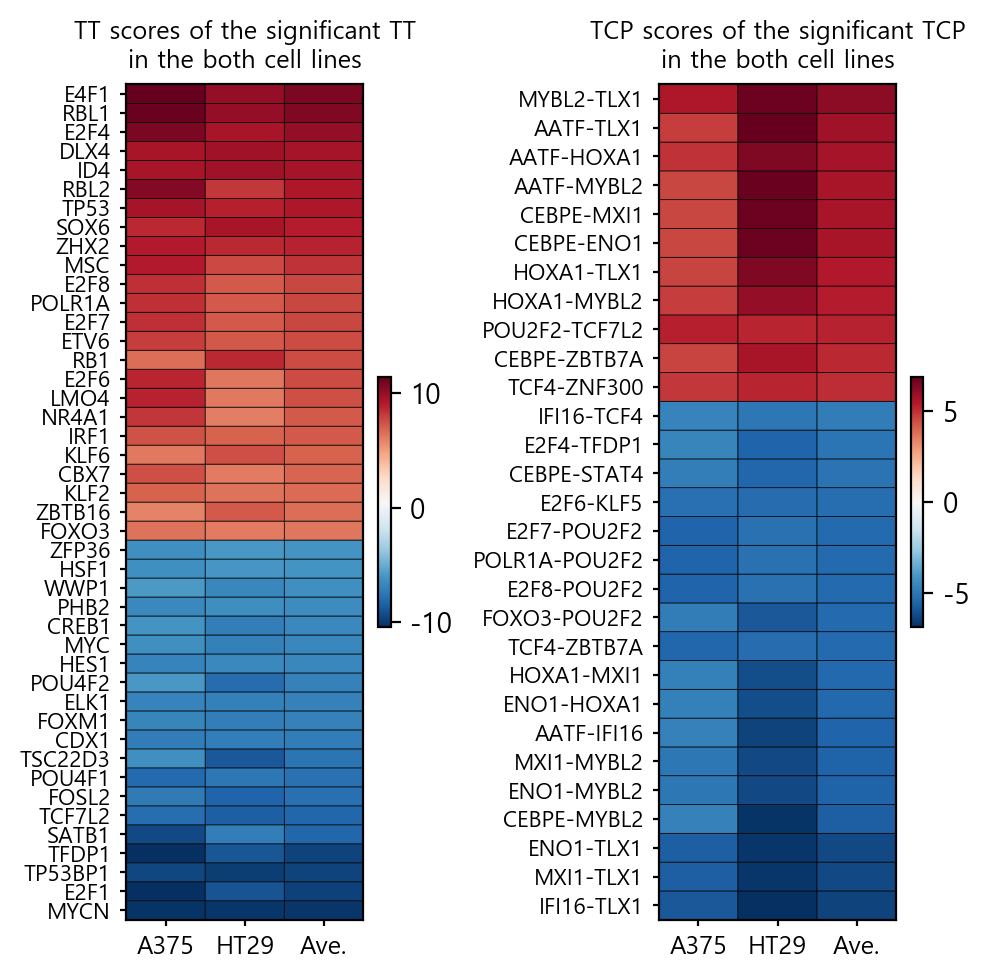

In [52]:
fig=plt.figure(figsize=(5,5), dpi=200)
(ax1, ax2) = fig.subplots(1,2)

#### TTS heatmap of both significant TT
TT=pd.read_table('result/TTscore/TTS_both.txt', sep='\t',index_col=0,engine='python')
TT=TT[[c for c in TT.columns if c.startswith("TTS")]]
TT.columns=['A375','HT29']

OV_sigTT=pd.read_table('result/sig_TT&TCP/sig_TT.txt', sep='\t',index_col=0,header=None, engine='python')
OV_sigTCPos=OV_sigTT.loc['both(pos)'].iloc[1].split(',')
OV_sigTTNeg=OV_sigTT.loc['both(neg)'].iloc[1].split(',')
OV_TT_list=OV_sigTCPos+OV_sigTTNeg

OV_sigTTS=TT.loc[OV_TT_list]
OV_sigTTS['Ave.']=OV_sigTTS.apply(lambda x: np.mean(x), axis=1)
OV_sigTTS.sort_values(by='Ave.', ascending=False, inplace=True)
OV_sigTTS_rev=OV_sigTTS.iloc[range(len(OV_sigTTS)-1,-1,-1)]

hm1=ax1.pcolor(OV_sigTTS_rev, cmap="RdBu_r", edgecolor='k')
_=ax1.set_yticks(np.arange(len(OV_sigTTS_rev))+0.5)
_=ax1.set_yticklabels(list(OV_sigTTS_rev.index), fontsize=8)
_=ax1.set_xticks(np.arange(3)+0.5)
_=ax1.set_xticklabels(OV_sigTTS_rev.columns, fontsize=9)
ax1.tick_params(axis='both', length=2)
fig.colorbar(hm1,ax=ax1, shrink=0.3)
ax1.set_title('TT scores of the significant TT\nin the both cell lines', fontsize=9)

#### TCPS heatmap of both significant TCP
TCP=pd.read_table('result/TCPscore/TCPS_both_dupDel.txt', sep='\t',index_col=0,engine='python')
TCP.set_index(['g1','g2'], inplace=True)
TCP=TCP[[c for c in TCP.columns if c.startswith("Zobs(TCPS)")]]
TCP.columns=['A375','HT29']

OV_sigTCP=pd.read_table('result/sig_TT&TCP/sig_TCP.txt', sep='\t',index_col=0,header=None, engine='python')
OV_sigTCPPos=OV_sigTCP.loc['both(pos)'].iloc[1].split(',')
OV_sigTCPNeg=OV_sigTCP.loc['both(neg)'].iloc[1].split(',')
OV_TCP_list=OV_sigTCPPos+OV_sigTCPNeg

OV_sigTCPS=TCP.loc[[tuple(TCP.split('|')) for TCP in OV_TCP_list]]
OV_sigTCPS['Ave.']=OV_sigTCPS.apply(lambda x: np.mean(x), axis=1)
OV_sigTCPS.sort_values(by='Ave.', ascending=False, inplace=True)
OV_sigTCPS.head()
OV_sigTCPS_rev=OV_sigTCPS.iloc[range(len(OV_sigTCPS)-1,-1,-1)]
OV_sigTCPS_rev.head()

hm1=ax2.pcolor(OV_sigTCPS_rev, cmap="RdBu_r", edgecolor='k')
_=ax2.set_yticks(np.arange(len(OV_sigTCPS_rev))+0.5)
yticklabel=['-'.join(index) for index in list(OV_sigTCPS_rev.index)]
_=ax2.set_yticklabels(yticklabel, fontsize=8)
_=ax2.set_xticks(np.arange(3)+0.5)
_=ax2.set_xticklabels(OV_sigTCPS_rev.columns, fontsize=9)
ax2.tick_params(axis='both', length=2)
fig.colorbar(hm1,ax=ax2, shrink=0.3, ticks=)

ax2.set_title('TCP scores of the significant TCP\nin the both cell lines', fontsize=9)

fig.tight_layout()
fig.show()

# landscape of both significant BTCP

In [4]:
# get ave. TT score for each TF
TT=pd.read_table('result/TTscore/TTS_both.txt', sep='\t',index_col=0,engine='python')
TT=TT[[c for c in TT.columns if c.startswith("TTS")]]
TT.columns=['A375','HT29']

TTS_dic=TT.apply(lambda x: np.mean(x), axis=1).to_dict()

# get both significant TCP
TCP=pd.read_table('result/TCPscore/TCPS_both_dupDel.txt', sep='\t',index_col=0,engine='python')
TCP.set_index(['g1','g2'], inplace=True)
TCP=TCP[[c for c in TCP.columns if c.startswith("Zobs(TCPS)")]]
TCP.columns=['A375','HT29']

OV_sigTCP=pd.read_table('result/sig_TT&TCP/sig_TCP.txt', sep='\t',index_col=0,header=None, engine='python')
OV_sigTCPPos=OV_sigTCP.loc['both(pos)'].iloc[1].split(',')
OV_sigTCPNeg=OV_sigTCP.loc['both(neg)'].iloc[1].split(',')
OV_TCP_list=OV_sigTCPPos+OV_sigTCPNeg

OV_sigTCPS=TCP.loc[[tuple(TCP.split('|')) for TCP in OV_TCP_list]]
OV_sigTCPS['Ave.']=OV_sigTCPS.apply(lambda x: np.mean(x), axis=1)
OV_sigTCPS.sort_values(by='Ave.', ascending=False, inplace=True)
OV_sigTCPS.head(20)

A375   HT29    Ave.
g1     g2                          
MYBL2  TLX1    5.548  6.711  6.1295
AATF   TLX1    4.720  6.871  5.7955
       HOXA1   4.957  6.423  5.6900
       MYBL2   4.560  6.767  5.6635
CEBPE  MXI1    4.560  6.725  5.6425
       ENO1    4.560  6.725  5.6425
HOXA1  TLX1    4.624  6.418  5.5210
       MYBL2   4.746  6.047  5.3965
POU2F2 TCF7L2  5.345  5.248  5.2965
CEBPE  ZBTB7A  4.639  5.682  5.1605
TCF4   ZNF300  4.877  5.256  5.0665
IFI16  TCF4   -4.641 -4.986 -4.8135
E2F4   TFDP1  -4.563 -5.542 -5.0525
CEBPE  STAT4  -4.791 -5.471 -5.1310
E2F6   KLF5   -5.191 -5.306 -5.2485
E2F7   POU2F2 -5.560 -5.159 -5.3595
POLR1A POU2F2 -5.560 -5.159 -5.3595
E2F8   POU2F2 -5.560 -5.159 -5.3595
FOXO3  POU2F2 -4.860 -5.862 -5.3610
TCF4   ZBTB7A -5.496 -5.303 -5.3995

{'MYBL2': Text(5.0, 4.696183305101618e-08, 'MYBL2'),
 'TLX1': Text(4.797464907855252, 1.4086628382117246, 'TLX1'),
 'AATF': Text(4.206267597979213, 2.703203894752126, 'AATF'),
 'HOXA1': Text(3.274303680542166, 3.7787479503862396, 'HOXA1'),
 'CEBPE': Text(2.077075252895073, 4.548159869281688, 'CEBPE'),
 'MXI1': Text(0.7115743454492417, 4.94910720030603, 'MXI1'),
 'ENO1': Text(-0.7115741625713551, 4.94910720030603, 'ENO1'),
 'POU2F2': Text(-2.077075070017186, 4.548159869281688, 'POU2F2'),
 'TCF7L2': Text(-3.274303348652668, 3.7787482484094626, 'TCF7L2'),
 'ZBTB7A': Text(-4.20626786213616, 2.703203894752126, 'ZBTB7A'),
 'TCF4': Text(-4.797464873988977, 1.4086631362349473, 'TCF4'),
 'ZNF300': Text(-4.999999966133724, -3.9015204833602115e-07, 'ZNF300'),
 'IFI16': Text(-4.797464873988977, -1.4086627442880582, 'IFI16'),
 'E2F4': Text(-4.20626786213616, -2.703203502805237, 'E2F4'),
 'TFDP1': Text(-3.274303646675891, -3.7787478564625734, 'TFDP1'),
 'STAT4': Text(-2.077075368040409, -4.548159775

C:\Users\jmjung\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\jmjung\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \
C:\Users\jmjung\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:595: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  for c in edge_color]):


(-6, 6)

Text(0, 0.5, 'TCP score (edge)')

Text(0, 0.5, 'TT score (node)')

C:\Users\jmjung\Anaconda3\lib\site-packages\ipykernel_launcher.py:62: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
C:\Users\jmjung\Anaconda3\lib\site-packages\ipykernel_launcher.py:63: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


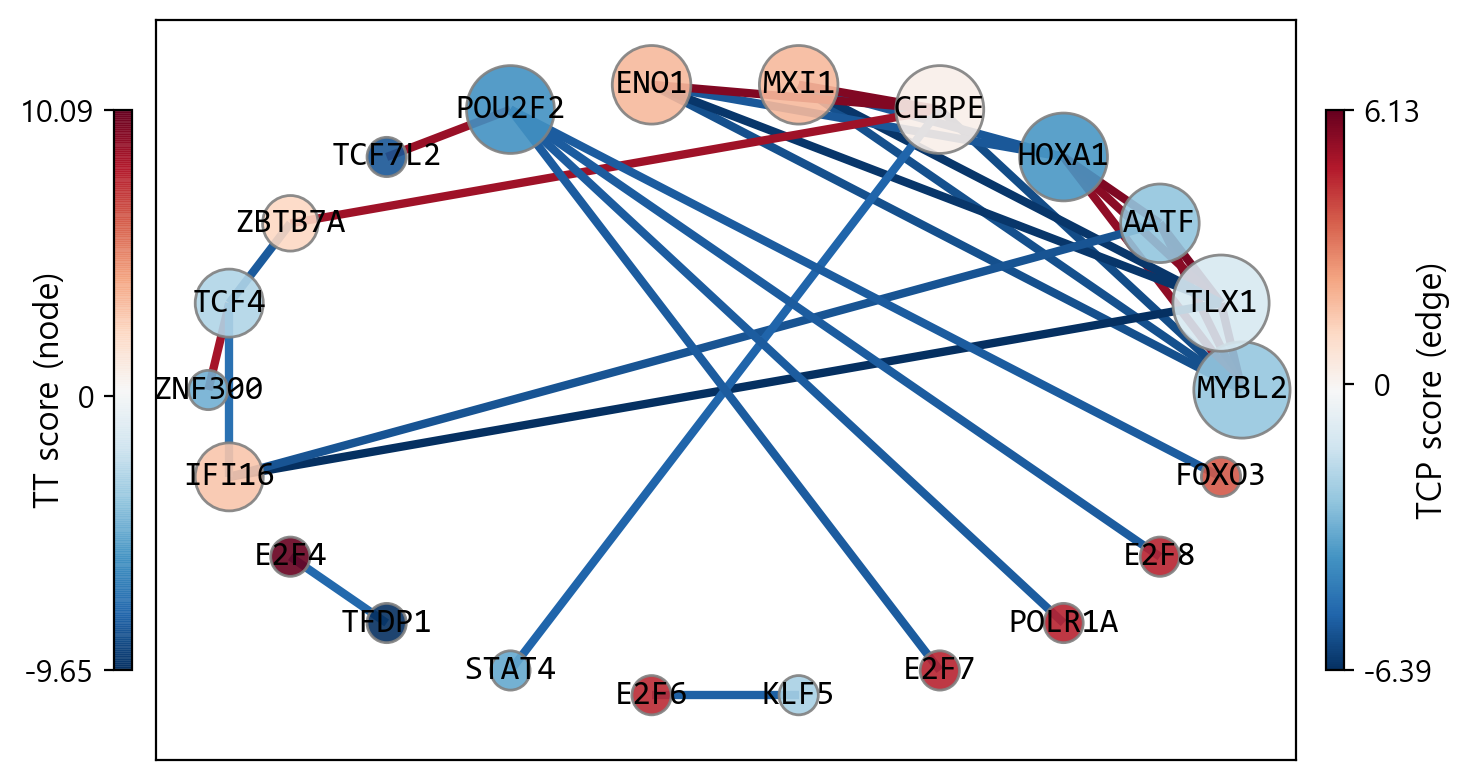

In [5]:
fig=plt.figure(figsize=(6,4), dpi=200)
ax1=fig.add_subplot(1,1,1)

# get sig TCP list & TCP network
TCP_nx=nx.Graph()
for ind in OV_sigTCPS.index:
    TCPS =OV_sigTCPS.loc[ind,'Ave.']
    g1,g2=ind
    TCP_nx.add_edge(g1, g2, TCPS=TCPS)
    
# attach TTS to nodes of TCP network
for nd1 in TCP_nx.nodes():
    TCP_nx.node[nd1]['TTS']=TTS_dic[nd1]

# draw TCP network
edges, edge_weights = zip(*nx.get_edge_attributes(TCP_nx,'TCPS').items())
nodes, node_weights = zip(*nx.get_node_attributes(TCP_nx,'TTS').items())
node_dic = {nd:nd for nd in TCP_nx.nodes()}
graph_pos = nx.circular_layout(TCP_nx, scale=5)

node_cm=nx.draw_networkx_nodes(G=TCP_nx, pos=graph_pos, nodelist=nodes,
                               node_size=[v * 200 for v in dict(TCP_nx.degree).values()],
                               node_color=node_weights, cmap=plt.cm.RdBu_r, alpha=0.9, edgecolors='gray',ax=ax1)

nx.draw_networkx_labels(G=TCP_nx, pos=graph_pos, labels=node_dic,font_size=12,
                        font_color='black', font_family='Consolas', ax=ax1)   

edge_cm=nx.draw_networkx_edges(G=TCP_nx, pos=graph_pos, edge_color=edge_weights, edge_cmap=plt.cm.RdBu_r, width=3, ax=ax1)

ax1.set_ylim(-6,6)
ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)


# edge color bar
cax1 = fig.add_axes([1, 0.15, 0.015, 0.7])
cbar=fig.colorbar(edge_cm, cax=cax1)

min1=np.min(edge_weights)
max1=np.max(edge_weights)
cbar.set_ticks([min1,0,max1])
cbar.set_ticklabels(['{:.2f}'.format(min1),' 0','{:.2f}'.format(max1)])
cbar.ax.tick_params(labelsize=11)
cbar.ax.set_ylabel('TCP score (edge)', fontsize=12)
cbar.ax.yaxis.set_label_coords(5,0.5)

# node color bar
cax2 = fig.add_axes([-0.01, 0.15, 0.015, 0.7])
cbar=fig.colorbar(node_cm, cax=cax2)

min1=np.min(node_weights)
max1=np.max(node_weights)
cbar.set_ticks([min1,0,max1])
cbar.set_ticklabels(['{:.2f}'.format(min1),' 0','{:.2f}'.format(max1)])
cbar.ax.tick_params(labelsize=11)
cbar.ax.tick_params(left=True,labelleft=True)
cbar.ax.tick_params(right=False,labelright=False)
cbar.ax.set_ylabel('TT score (node)', fontsize=12)
cbar.ax.yaxis.set_label_coords(-4.5,0.5)

# figure show
fig.tight_layout()
fig.show()

In [9]:
len(TCP_nx.edges())

29